In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.tree import DecisionTreeClassifier

In [2]:
df=pd.read_csv('Fraud_check.csv')

In [3]:
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [5]:
print('percentage of null values :','\n',df.isnull().sum()/df.shape[0]*100)

percentage of null values : 
 Undergrad          0.0
Marital.Status     0.0
Taxable.Income     0.0
City.Population    0.0
Work.Experience    0.0
Urban              0.0
dtype: float64


In [6]:
df.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


<AxesSubplot:xlabel='Taxable.Income', ylabel='Density'>

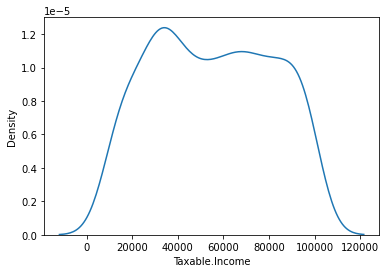

In [7]:
sns.kdeplot(df['Taxable.Income'])

C:\Users\sagar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Taxable.Income'>

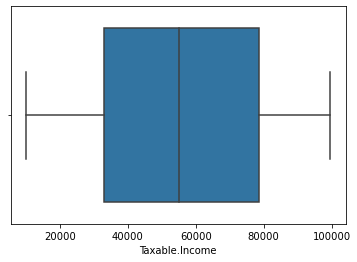

In [8]:
sns.boxplot(df['Taxable.Income'])

In [9]:
df['Undergrad'].value_counts()

YES    312
NO     288
Name: Undergrad, dtype: int64

In [10]:
df['Urban'].value_counts()

YES    302
NO     298
Name: Urban, dtype: int64

C:\Users\sagar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Undergrad', ylabel='count'>

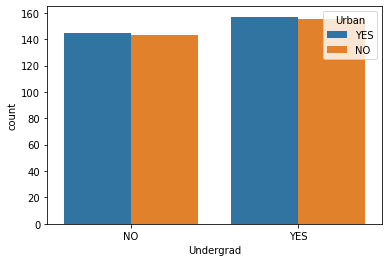

In [11]:
sns.countplot(df['Undergrad'],hue=df['Urban'])

In [12]:
df['Taxable.Income']=pd.cut(df['Taxable.Income'],bins=[0,30000,100000],labels=['Risky','Good'])

In [13]:
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,Good,50047,10,YES
1,YES,Divorced,Good,134075,18,YES
2,NO,Married,Good,160205,30,YES
3,YES,Single,Good,193264,15,YES
4,NO,Married,Good,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,Good,39492,7,YES
596,YES,Divorced,Good,55369,2,YES
597,NO,Divorced,Good,154058,0,YES
598,YES,Married,Good,180083,17,NO


In [14]:
df['Taxable.Income'].value_counts()

Good     476
Risky    124
Name: Taxable.Income, dtype: int64

C:\Users\sagar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Taxable.Income', ylabel='count'>

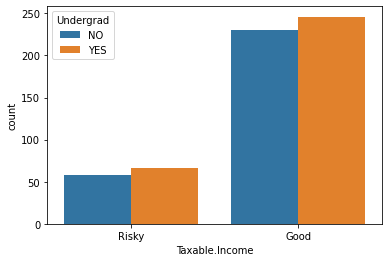

In [15]:
sns.countplot(df['Taxable.Income'],hue=df['Undergrad'])

In [17]:
df['Marital.Status'].value_counts()

Single      217
Married     194
Divorced    189
Name: Marital.Status, dtype: int64

C:\Users\sagar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Marital.Status', ylabel='count'>

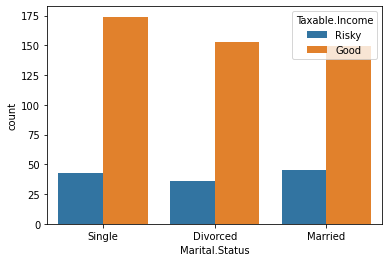

In [19]:
sns.countplot(df['Marital.Status'],hue=df['Taxable.Income'])

C:\Users\sagar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Taxable.Income', ylabel='count'>

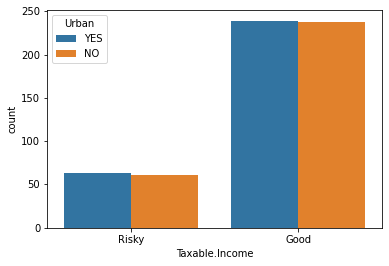

In [21]:
sns.countplot(df['Taxable.Income'],hue=df['Urban'])

In [31]:
df['Work.Experience'].unique()

array([10, 18, 30, 15, 28,  0,  8,  3, 12,  4, 19,  6, 14, 16, 13, 29, 25,
       26,  7, 27,  5, 21, 23,  1, 22,  2, 11,  9, 24, 17, 20],
      dtype=int64)

<AxesSubplot:xlabel='Work.Experience', ylabel='Density'>

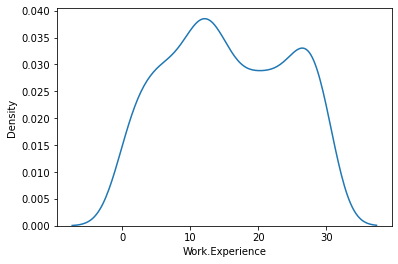

In [34]:
sns.kdeplot(df['Work.Experience'])

<AxesSubplot:xlabel='Work.Experience', ylabel='Density'>

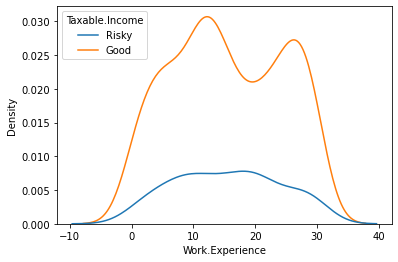

In [35]:
sns.kdeplot(df['Work.Experience'],hue=df['Taxable.Income'])

C:\Users\sagar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Work.Experience', ylabel='count'>

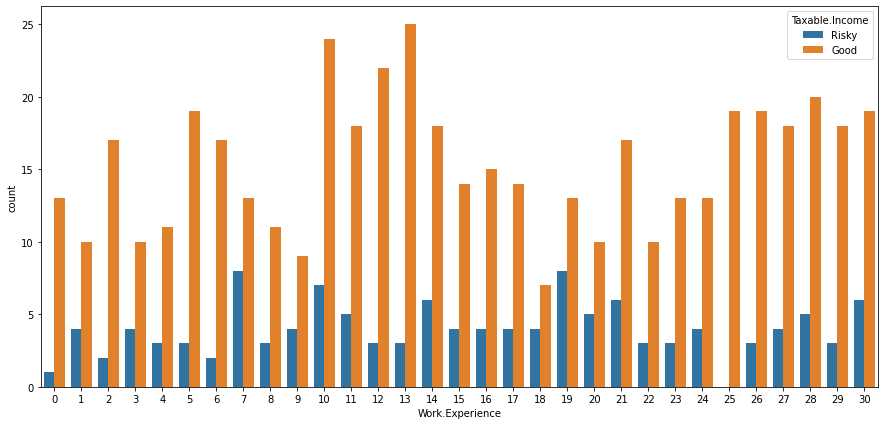

In [41]:
plt.figure(figsize=(15,7))
sns.countplot(df['Work.Experience'],hue=df['Taxable.Income'])

In [42]:
df['Undergrad']=df['Undergrad'].map({'YES':1,'NO':0})

In [44]:
df['Marital.Status']=df['Marital.Status'].map({'Single':1,'Divorced':3,'Married':2})
df['Urban']=df['Urban'].map({'YES':1,'NO':0})

In [45]:
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,1,Good,50047,10,1
1,1,3,Good,134075,18,1
2,0,2,Good,160205,30,1
3,1,1,Good,193264,15,1
4,0,2,Good,27533,28,0
...,...,...,...,...,...,...
595,1,3,Good,39492,7,1
596,1,3,Good,55369,2,1
597,0,3,Good,154058,0,1
598,1,2,Good,180083,17,0


In [46]:
df.corr()

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
Undergrad,1.000000,-0.042407,0.079579,-0.005362,-0.000267
Marital.Status,-0.042407,1.000000,0.001564,0.002213,-0.064562
City.Population,0.079579,0.001564,1.000000,0.013135,-0.040098
Work.Experience,-0.005362,0.002213,0.013135,1.000000,-0.094559
Urban,-0.000267,-0.064562,-0.040098,-0.094559,1.000000


<AxesSubplot:>

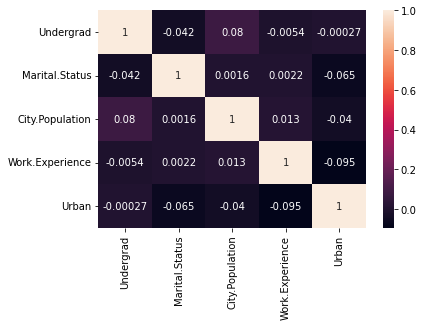

In [49]:
sns.heatmap(df.corr(),annot=True)

In [67]:
x=df[['Undergrad','Marital.Status','City.Population','Work.Experience','Urban']]
x

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
0,0,1,50047,10,1
1,1,3,134075,18,1
2,0,2,160205,30,1
3,1,1,193264,15,1
4,0,2,27533,28,0
...,...,...,...,...,...
595,1,3,39492,7,1
596,1,3,55369,2,1
597,0,3,154058,0,1
598,1,2,180083,17,0


In [65]:
y=df.iloc[:,2]
y

0      Good
1      Good
2      Good
3      Good
4      Good
       ... 
595    Good
596    Good
597    Good
598    Good
599    Good
Name: Taxable.Income, Length: 600, dtype: category
Categories (2, object): ['Risky' < 'Good']

In [51]:
from sklearn.model_selection import train_test_split

In [121]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=7)

In [122]:
print(x_train.shape,x_test.shape)

(480, 5) (120, 5)


In [123]:
print(y_train.shape,y_test.shape)

(480,) (120,)


## Logistic Regression

In [124]:
from sklearn.linear_model import LogisticRegression

In [125]:
model=LogisticRegression(max_iter=300)
model.fit(x_train,y_train)

LogisticRegression(max_iter=300)

In [126]:
y_pred=model.predict(x_test)

In [127]:
y_test.reset_index(drop=True,inplace=True)

In [128]:
y_test

0       Good
1       Good
2      Risky
3       Good
4      Risky
       ...  
115    Risky
116    Risky
117    Risky
118     Good
119     Good
Name: Taxable.Income, Length: 120, dtype: category
Categories (2, object): ['Risky' < 'Good']

In [129]:
pred=pd.DataFrame(data=[y_test,y_pred])

In [130]:
pred.T

,Taxable.Income,Unnamed 0
0,Good,Good
1,Good,Good
2,Risky,Good
3,Good,Good
4,Risky,Good
...,...,...
115,Risky,Good
116,Risky,Good
117,Risky,Good
118,Good,Good


In [131]:
confusion_matrix(y_test,y_pred)

array([[91,  0],
       [29,  0]], dtype=int64)

In [132]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

        Good       0.76      1.00      0.86        91
       Risky       0.00      0.00      0.00        29

    accuracy                           0.76       120
   macro avg       0.38      0.50      0.43       120
weighted avg       0.58      0.76      0.65       120



In [133]:
x_pred=model.predict(x_train)

In [134]:
confusion_matrix(y_train,x_pred)

array([[385,   0],
       [ 95,   0]], dtype=int64)

## DecisionTree
* decision tree using gini

In [135]:
model_1=DecisionTreeClassifier(random_state=0)
model_1.fit(x_train,y_train)
y_pred=model_1.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[74 17]
 [23  6]]
              precision    recall  f1-score   support

        Good       0.76      0.81      0.79        91
       Risky       0.26      0.21      0.23        29

    accuracy                           0.67       120
   macro avg       0.51      0.51      0.51       120
weighted avg       0.64      0.67      0.65       120



In [136]:
x_pred=model_1.predict(x_train)
print(confusion_matrix(y_train,x_pred))
print(classification_report(y_train,x_pred))

[[385   0]
 [  0  95]]
              precision    recall  f1-score   support

        Good       1.00      1.00      1.00       385
       Risky       1.00      1.00      1.00        95

    accuracy                           1.00       480
   macro avg       1.00      1.00      1.00       480
weighted avg       1.00      1.00      1.00       480



*Decisiontree using entropy

In [137]:
model_2=DecisionTreeClassifier(criterion='entropy',random_state=0)
model_2.fit(x_train,y_train)
y_pred=model_2.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[70 21]
 [26  3]]
              precision    recall  f1-score   support

        Good       0.73      0.77      0.75        91
       Risky       0.12      0.10      0.11        29

    accuracy                           0.61       120
   macro avg       0.43      0.44      0.43       120
weighted avg       0.58      0.61      0.60       120



In [138]:
x_pred=model_2.predict(x_train)
print(confusion_matrix(y_train,x_pred))
print(classification_report(y_train,x_pred))

[[385   0]
 [  0  95]]
              precision    recall  f1-score   support

        Good       1.00      1.00      1.00       385
       Risky       1.00      1.00      1.00        95

    accuracy                           1.00       480
   macro avg       1.00      1.00      1.00       480
weighted avg       1.00      1.00      1.00       480



In [139]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [146]:
kfold=KFold(n_splits=10)
model_3=DecisionTreeClassifier()
result=cross_val_score(model_3,x,y,cv=kfold)
print(result.mean())

0.6300000000000001


In [147]:
kfold=KFold(n_splits=10)
model_4=DecisionTreeClassifier(criterion='entropy')
result=cross_val_score(model_4,x,y,cv=kfold)
print(result.mean())

0.65


In [155]:
from sklearn.ensemble import AdaBoostClassifier
gini=DecisionTreeClassifier()
model_5=AdaBoostClassifier(base_estimator=gini,n_estimators=10,random_state=42)
model_5.fit(x_train,y_train)
y_pred=model_5.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[74 17]
 [23  6]]
              precision    recall  f1-score   support

        Good       0.76      0.81      0.79        91
       Risky       0.26      0.21      0.23        29

    accuracy                           0.67       120
   macro avg       0.51      0.51      0.51       120
weighted avg       0.64      0.67      0.65       120



In [156]:
x_pred=model_5.predict(x_train)
print(confusion_matrix(y_train,x_pred))
print(classification_report(y_train,x_pred))

[[385   0]
 [  0  95]]
              precision    recall  f1-score   support

        Good       1.00      1.00      1.00       385
       Risky       1.00      1.00      1.00        95

    accuracy                           1.00       480
   macro avg       1.00      1.00      1.00       480
weighted avg       1.00      1.00      1.00       480



In [157]:
entropy=DecisionTreeClassifier(criterion='entropy')
model_6=AdaBoostClassifier(base_estimator=gini,n_estimators=20,random_state=42)
model_6.fit(x_train,y_train)
y_pred=model_6.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[74 17]
 [23  6]]
              precision    recall  f1-score   support

        Good       0.76      0.81      0.79        91
       Risky       0.26      0.21      0.23        29

    accuracy                           0.67       120
   macro avg       0.51      0.51      0.51       120
weighted avg       0.64      0.67      0.65       120



In [158]:
x_pred=model_5.predict(x_train)
print(confusion_matrix(y_train,x_pred))
print(classification_report(y_train,x_pred))

[[385   0]
 [  0  95]]
              precision    recall  f1-score   support

        Good       1.00      1.00      1.00       385
       Risky       1.00      1.00      1.00        95

    accuracy                           1.00       480
   macro avg       1.00      1.00      1.00       480
weighted avg       1.00      1.00      1.00       480

